# Sentiment Analysis using data from IMDB, Yelp, and Amazon reviews

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
imdb_data = pd.read_csv('imdb_labelled.txt', sep='.  ')
imdb_data.columns = ['text', 'label']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [20]:
imdb_data.head()

,text,label
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [21]:
import nltk

In [22]:
amazon_data = pd.read_csv('amazon_cells_labelled.txt', sep='\t')
amazon_data.columns = ['text', 'label']

In [23]:
yelp_data = pd.read_csv('yelp_labelled.txt', sep='\t')
yelp_data.columns = ['text', 'label']

In [24]:
amazon_data.head()

,text,label
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [25]:
umich_data = pd.read_csv('training.txt', sep='\t')
umich_data.columns = ['label', 'text']

In [26]:
frames = [imdb_data, amazon_data, yelp_data, umich_data]
data = pd.concat(frames)

In [27]:
data.head()

,label,text
0,0,Not sure who was more lost - the flat characte...
1,0,Attempting artiness with black & white and cle...
2,0,Very little music or anything to speak of
3,1,The best scene in the movie was when Gerardo i...
4,0,"The rest of the movie lacks art, charm, meanin..."


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 6916
Data columns (total 2 columns):
label    9914 non-null int64
text     9914 non-null object
dtypes: int64(1), object(1)
memory usage: 232.4+ KB


In [29]:
def length(string):
    return len(string)
  
    
data['text length'] = data['text'].apply(length)

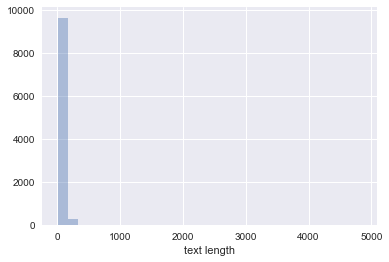

In [30]:
sns.distplot(data['text length'], kde=False, bins=30)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [32]:
X = data['text']
y = data['label']

X = cv.fit_transform(X)

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
nb = MultinomialNB()

In [36]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
predictions = nb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.90      0.91      1324
          1       0.92      0.93      0.93      1651

avg / total       0.92      0.92      0.92      2975



In [40]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import  TfidfTransformer

In [41]:

pipeline = Pipeline([('vectorizer', CountVectorizer()),('tfidf', TfidfTransformer()), ('mlp', MLPClassifier(hidden_layer_sizes=(100,2)))])

In [42]:
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [43]:
predictions = pipeline.predict(X_test)

In [44]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.89      0.92      1324
          1       0.92      0.96      0.94      1651

avg / total       0.93      0.93      0.93      2975



In [45]:
#more_data.info()

NameError: name 'more_data' is not defined

In [15]:
#X = more_data['Phrase']
#y = more_data['Sentiment']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#pipeline_nb1 = Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

#pipeline_nb1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [17]:
#predictions = pipeline_nb1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [46]:
pipeline.predict(['This was a great movie!'])

array([1])

In [47]:
def analyze_sentiment(string):
    if pipeline.predict([string]) == [1]:
        return "Positive review!"
    else:
        return "Negative review!"

In [48]:
analyze_sentiment('Great!')

'Positive review!'

In [49]:
analyze_sentiment('I really hated the pointless action sequences!')

'Negative review!'

In [50]:
analyze_sentiment('That was a very unusual and strange choice')

'Positive review!'

In [51]:
analyze_sentiment('We purchased from Sears a new Kenmore Elite electric double-wall oven Model # 79048459 in December, 2016 for our remodeled kitchen. In all instances, when trying to broil chicken, beef, or fish in our top oven, the oven generated so much smoke and grease that our fire alarms (located about 20 feet away between two rooms) would go off. We contacted Sears, and their experienced technicians came to our home and essentially replaced all of the electrical components in our oven and the heating coil. After this was completed, we placed a 1 inch steak on a professional broiling pan in the top oven at 550 degrees, and lowered the rack position to 4 according to the Sears manual for this oven and in less than 4 minutes in the oven (without even opening the door of the oven) the smoke being blown out of the top of the oven was so dense that our fire alarms went off once again.')

'Positive review!'

In [52]:
analyze_sentiment('This was not a good experience')

'Positive review!'

In [53]:
analyze_sentiment('That was terrible!')

'Negative review!'

In [54]:
analyze_sentiment('That was not that good')

'Negative review!'

In [55]:
analyze_sentiment('Ordered 4 mouse pads from China. They never arrived. When I looked at the Amazon tracking it said it was delivered to my home in Wooster, Ohio. I then took the USPS tracking number and found that it was delivered to a different address in Pennsylvania!!! I contacted the seller and he never responded to me. When I looked on the Amazon site for a customer service number to call... There was NONE!!!')

'Negative review!'

In [56]:
analyze_sentiment("Thanks to a high concentration of sodium and magnesium in Dead Sea mud. this mask claims to draw out blackheads and blemishes like a magnet. With ingredients like kaolin and sunflower oils, we believe it. Amazon user Destinee Ray couldn't agree more. My blackheads were gone and my skin just looked brighter and also felt really soft. I didn't have any irritation or bad reaction, which I was worried about at first because I do have very sensitive skin.")

'Positive review!'

In [58]:
analyze_sentiment('My skin looked brighter and also felt really soft. That was really good!')

'Negative review!'